# Final Project

## System Setup & Data Load

In [1]:
!pip install statsmodels

In [2]:
# Imports

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt



In [3]:
# Connection

DB_USER = "mfre521d_user"
DB_PASSWORD = "mfre521d_user_pw"
DB_HOST = "localhost"
DB_PORT = "3306"
DB_NAME = "mfre521d"

connection_string = (
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)
engine = create_engine(connection_string)

print("Connection established!")

Connection established!


In [4]:
# pulling the integrated dataset

df_integrated = pd.read_sql("SELECT * FROM crop_weather_integrated;", engine)
df_integrated.shape
df_integrated.head()

,country_id,country_name,iso3_code,region,income_group,year,crop_id,area_harvested_ha,production_tonnes,yield_kg_ha,...,n_days,temperature_mean_yr,temperature_max_yr,temperature_min_yr,precipitation_yr,rain_yr,evapotranspiration_yr,gdd_yr,precipitation_sd_yr,extreme_temp_days_yr
0,1,China,CHN,East Asia,Upper middle income,2015,1,3462170.0,20981200.0,6060.13,...,365,9.363562,34.2,-13.1,487.899999,409.399999,1162.74,1380.900003,3.647763,141.0
1,1,China,CHN,East Asia,Upper middle income,2015,2,4480770.0,NaN,7985.39,...,365,9.363562,34.2,-13.1,487.899999,409.399999,1162.74,1380.900003,3.647763,141.0
2,1,China,CHN,East Asia,Upper middle income,2015,3,4853030.0,23410200.0,4823.83,...,365,9.363562,34.2,-13.1,487.899999,409.399999,1162.74,1380.900003,3.647763,141.0
3,1,China,CHN,East Asia,Upper middle income,2015,4,4066070.0,29467400.0,7247.14,...,365,9.363562,34.2,-13.1,487.899999,409.399999,1162.74,1380.900003,3.647763,141.0
4,1,China,CHN,East Asia,Upper middle income,2016,1,1859830.0,16251000.0,8737.91,...,366,9.532514,33.4,-18.5,412.800001,368.200001,1184.06,1506.799999,2.814997,135.0


In [5]:
df_integrated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_id             1106 non-null   int64  
 1   country_name           1106 non-null   object 
 2   iso3_code              1106 non-null   object 
 3   region                 1106 non-null   object 
 4   income_group           1106 non-null   object 
 5   year                   1106 non-null   int64  
 6   crop_id                1106 non-null   int64  
 7   area_harvested_ha      1106 non-null   float64
 8   production_tonnes      1054 non-null   float64
 9   yield_kg_ha            1080 non-null   float64
 10  fertilizer_use_kg_ha   1074 non-null   float64
 11  irrigation_pct         1072 non-null   float64
 12  notes                  54 non-null     object 
 13  n_days                 1106 non-null   int64  
 14  temperature_mean_yr    1106 non-null   float64
 15  temp

### Data Checks

In [6]:
# checking number of observations by crop_id column
df_integrated["crop_id"].value_counts().sort_index()

crop_id
1    306
2    258
3    236
4    306
Name: count, dtype: int64

In [7]:
# bringing in crop information (crop_id, crop_name)
crop_lookup = pd.read_sql("SELECT crop_id, crop_name FROM crops;", engine)
crop_lookup

,crop_id,crop_name
0,1,Maize
1,2,Rice
2,3,Soybeans
3,4,Wheat


In [8]:
# merging dataframes to assign crop_name
df_integrated = df_integrated.merge(crop_lookup, on="crop_id", how="left")
df_integrated["crop_name"].value_counts()

crop_name
Maize       306
Wheat       306
Rice        258
Soybeans    236
Name: count, dtype: int64

In [9]:
df_integrated.head()

,country_id,country_name,iso3_code,region,income_group,year,crop_id,area_harvested_ha,production_tonnes,yield_kg_ha,...,temperature_mean_yr,temperature_max_yr,temperature_min_yr,precipitation_yr,rain_yr,evapotranspiration_yr,gdd_yr,precipitation_sd_yr,extreme_temp_days_yr,crop_name
0,1,China,CHN,East Asia,Upper middle income,2015,1,3462170.0,20981200.0,6060.13,...,9.363562,34.2,-13.1,487.899999,409.399999,1162.74,1380.900003,3.647763,141.0,Maize
1,1,China,CHN,East Asia,Upper middle income,2015,2,4480770.0,NaN,7985.39,...,9.363562,34.2,-13.1,487.899999,409.399999,1162.74,1380.900003,3.647763,141.0,Rice
2,1,China,CHN,East Asia,Upper middle income,2015,3,4853030.0,23410200.0,4823.83,...,9.363562,34.2,-13.1,487.899999,409.399999,1162.74,1380.900003,3.647763,141.0,Soybeans
3,1,China,CHN,East Asia,Upper middle income,2015,4,4066070.0,29467400.0,7247.14,...,9.363562,34.2,-13.1,487.899999,409.399999,1162.74,1380.900003,3.647763,141.0,Wheat
4,1,China,CHN,East Asia,Upper middle income,2016,1,1859830.0,16251000.0,8737.91,...,9.532514,33.4,-18.5,412.800001,368.200001,1184.06,1506.799999,2.814997,135.0,Maize


In [10]:
# checking missing data for yield_kg_ha, temperature_mean_yr & precipitation_yr
key_cols = ["yield_kg_ha", "temperature_mean_yr", "precipitation_yr"]
df_integrated[key_cols].isna().mean().sort_values(ascending=False)

yield_kg_ha            0.023508
temperature_mean_yr    0.000000
precipitation_yr       0.000000
dtype: float64

In [11]:
df_integrated[key_cols].isna().sum()

yield_kg_ha            26
temperature_mean_yr     0
precipitation_yr        0
dtype: int64

There are no missing data for temperature_mean_yr and precipitation_yr; however, there are 2.35% (26 observations) of data missing for yield_kg_ha.

## Research Question 1 (RQ1) - Identifying Climate-Vulnerable Crops

### Creating RQ1 dataset

In [12]:
# creating RQ1 dataset
df_rq1 = df_integrated.copy()
df_rq1.shape

(1106, 24)

Dropping NA values from yield_kg_ha for future analysis.

In [13]:
# creating model data (no NAs)
df_rq1_model = df_rq1.dropna(subset=["yield_kg_ha"]).copy()
df_rq1_model.shape

(1080, 24)

In [14]:
# log transforming crop yield
df_rq1_model = df_rq1_model[df_rq1_model["yield_kg_ha"] > 0].copy()
df_rq1_model["ln_yield"] = np.log(df_rq1_model["yield_kg_ha"])

In [15]:
df_rq1_model.shape
df_rq1_model.head()

,country_id,country_name,iso3_code,region,income_group,year,crop_id,area_harvested_ha,production_tonnes,yield_kg_ha,...,temperature_max_yr,temperature_min_yr,precipitation_yr,rain_yr,evapotranspiration_yr,gdd_yr,precipitation_sd_yr,extreme_temp_days_yr,crop_name,ln_yield
0,1,China,CHN,East Asia,Upper middle income,2015,1,3462170.0,20981200.0,6060.13,...,34.2,-13.1,487.899999,409.399999,1162.74,1380.900003,3.647763,141.0,Maize,8.709487
1,1,China,CHN,East Asia,Upper middle income,2015,2,4480770.0,NaN,7985.39,...,34.2,-13.1,487.899999,409.399999,1162.74,1380.900003,3.647763,141.0,Rice,8.985369
2,1,China,CHN,East Asia,Upper middle income,2015,3,4853030.0,23410200.0,4823.83,...,34.2,-13.1,487.899999,409.399999,1162.74,1380.900003,3.647763,141.0,Soybeans,8.481323
3,1,China,CHN,East Asia,Upper middle income,2015,4,4066070.0,29467400.0,7247.14,...,34.2,-13.1,487.899999,409.399999,1162.74,1380.900003,3.647763,141.0,Wheat,8.888362
4,1,China,CHN,East Asia,Upper middle income,2016,1,1859830.0,16251000.0,8737.91,...,33.4,-18.5,412.800001,368.200001,1184.06,1506.799999,2.814997,135.0,Maize,9.075426


In [16]:
# checking crop yield data
df_rq1_model.groupby("crop_name")["yield_kg_ha"].describe()[
    ["count", "mean", "std", "min", "max"]
]

,count,mean,std,min,max
crop_name,,,,,
Maize,296.0,8865.059257,2857.152788,3105.75,17525.40
Rice,255.0,6934.460824,1918.290927,3375.41,12128.60
Soybeans,231.0,4311.928615,1342.530582,1266.20,8147.15
Wheat,298.0,5684.142148,1679.665100,2263.06,10059.60


In [17]:
pd.read_sql("SHOW TABLES;", engine)

,Tables_in_mfre521d
0,AirQuality_2
1,air_quality_readings
2,annual_weather
3,annual_weather_quality_checks
4,climate_agriculture_analysis
5,countries
6,country_heat_thresholds
7,country_name_mapping
8,country_year_crop_weather
9,crop_production


In [18]:
# Proxy for temperature variability proxy: temp_sd_daily_mean_yr
# from daily_weather, creating temp_sd_daily_mean_yr variable to measure temperature variation (how much temperature fluctuates day-to-day within the year)

sql_temp_var = """
SELECT
    iso3_code,
    year,
    STDDEV_SAMP(temperature_mean) AS temp_sd_daily_mean_yr
FROM daily_weather
GROUP BY iso3_code, year;
"""
df_temp_var = pd.read_sql(sql_temp_var, engine)
df_temp_var.head()

,iso3_code,year,temp_sd_daily_mean_yr
0,ARG,2015,6.229465
1,ARG,2016,6.729484
2,ARG,2017,6.186895
3,ARG,2018,6.853990
4,ARG,2019,6.456126


### Climate variables

#### Temperature variability

Our `daily_weather` table provides high-frequency daily weather data. We use this to calculate the sample standard deviation of the daily mean temperatures in each year for each country. This temp_sd_daily_mean_yr captures how much temperature fluctuates day-to-day within the year, i.e., the spread around the yearly mean of daily temperatures. This is better than simply using yearly temperature variation, which could mainly be picking up on seasonal variation and extreme temperatures. We also look at extreme_temp_days_yr, which captures the frequency of extreme heat exposure.

#### Precipitation and water availability variability

To assess precipitation variability we look at the standard deviation of precipitation within that year. Additionally, we look at water stress, by constructing a "water_deficit_yr" variable that is evapotranspiration_yr minus precipitation_yr, which measures a net moisture deficit. Water deficit is a level measure of annual water stress (evapotranspiration demand minus precipitation), while precipitation_sd_yr captures within-year variability in rainfall.

In [19]:
# adding newly created temp_sd_daily_mean_yr variable to the modeling dataframe

df_rq1_model = df_rq1_model.merge(df_temp_var, on=["iso3_code", "year"], how="left")
df_rq1_model[["temp_sd_daily_mean_yr"]].isna().mean()

temp_sd_daily_mean_yr    0.0
dtype: float64

In [20]:
# -----------------------------
# RQ1 variables creation
# -----------------------------

# Temperature variability: using
# within-year SD of DAILY mean temperature (computed from daily_weather (daily table), then aggregated to country-year SD) already merged
# extreme_temp_days_yr already in the data

# Water stress proxy: water deficit (higher = more deficit = more stress)
df_rq1_model["water_deficit_yr"] = (
    df_rq1_model["evapotranspiration_yr"] - df_rq1_model["precipitation_yr"]
)

# modeling variables
model_vars = [
    "ln_yield",
    "temperature_mean_yr",
    "precipitation_yr",
    "precipitation_sd_yr",
    "extreme_temp_days_yr",
    "temp_sd_daily_mean_yr",
    "water_deficit_yr",
    "fertilizer_use_kg_ha",
    "irrigation_pct",
]

# missingness check
missing = df_rq1_model[model_vars].isna().mean().sort_values(ascending=False)
missing

irrigation_pct           0.030556
fertilizer_use_kg_ha     0.029630
ln_yield                 0.000000
temperature_mean_yr      0.000000
precipitation_yr         0.000000
precipitation_sd_yr      0.000000
extreme_temp_days_yr     0.000000
temp_sd_daily_mean_yr    0.000000
water_deficit_yr         0.000000
dtype: float64

Given some missing values for irrigation_pct and fertilizer_use_kg_ha, these were dropped for modeling.

In [21]:
# Final modeling dataset for RQ1: drop rows missing any model vars

df_rq1_analysis = df_rq1_model.dropna(subset=model_vars).copy()

print("Rows before:", len(df_rq1_model))
print("Rows after :", len(df_rq1_analysis))
print("Dropped    :", len(df_rq1_model) - len(df_rq1_analysis))

Rows before: 1080
Rows after : 1017
Dropped    : 63


### Estimating the main model

We estimate crop-specific panel regressions of log yield on climate levels and climate variability measures, controlling for irrigation and fertilizer use and including country and year fixed effects. We use HC1 robust standard errors.

In [22]:
# running a regression per crop
# dependent variable: ln_yield
# key predictors: climate + controls
# country & year FEs included to control for time-invariant country specifics + global shocks/trends

formula = """
ln_yield
  ~ temperature_mean_yr
  + precipitation_yr
  + precipitation_sd_yr
  + extreme_temp_days_yr
  + temp_sd_daily_mean_yr
  + water_deficit_yr
  + fertilizer_use_kg_ha
  + irrigation_pct
  + C(iso3_code)
  + C(year)
"""


def run_crop_reg(df, crop):
    d = df[df["crop_name"] == crop].copy()
    model = smf.ols(formula, data=d).fit(cov_type="HC1")  # robust SEs
    return model, len(d)


crops = sorted(df_rq1_analysis["crop_name"].unique())
results = []

for c in crops:
    m, n = run_crop_reg(df_rq1_analysis, c)
    for var in [
        "temperature_mean_yr",
        "temp_sd_daily_mean_yr",
        "extreme_temp_days_yr",
        "precipitation_yr",
        "precipitation_sd_yr",
        "water_deficit_yr",
    ]:
        results.append(
            {
                "crop": c,
                "n": n,
                "variable": var,
                "coef": m.params.get(var),
                "se_robust": m.bse.get(var),
                "pvalue": m.pvalues.get(var),
                "r2": m.rsquared,
            }
        )

# extracting for each crop regression only the coefficient results for the climate variables we care about
rq1_coef_table = pd.DataFrame(results)
rq1_coef_table

,crop,n,variable,coef,se_robust,pvalue,r2
0,Maize,282,temperature_mean_yr,0.008568,0.033558,0.798483,0.683220
1,Maize,282,temp_sd_daily_mean_yr,0.043312,0.035507,0.222536,0.683220
2,Maize,282,extreme_temp_days_yr,-0.002643,0.001157,0.022388,0.683220
3,Maize,282,precipitation_yr,-0.000057,0.000341,0.867374,0.683220
4,Maize,282,precipitation_sd_yr,0.011914,0.011738,0.310084,0.683220
5,Maize,282,water_deficit_yr,0.000036,0.000318,0.910297,0.683220
6,Rice,238,temperature_mean_yr,-0.013929,0.021222,0.511600,0.875724
7,Rice,238,temp_sd_daily_mean_yr,-0.039802,0.023617,0.091930,0.875724
8,Rice,238,extreme_temp_days_yr,0.001826,0.000641,0.004393,0.875724
9,Rice,238,precipitation_yr,-0.000003,0.000193,0.988232,0.875724


In [23]:
# for each climate variable, list crops ordered by statistical significance (lowest p-value first)

rq1_coef_table.sort_values(["variable", "pvalue"]).groupby("variable").head(4)

,crop,n,variable,coef,se_robust,pvalue,r2
8,Rice,238,extreme_temp_days_yr,0.001826,0.000641,0.004393,0.875724
2,Maize,282,extreme_temp_days_yr,-0.002643,0.001157,0.022388,0.683220
14,Soybeans,215,extreme_temp_days_yr,-0.002038,0.001194,0.087802,0.769526
20,Wheat,282,extreme_temp_days_yr,-0.001421,0.000976,0.145454,0.758822
16,Soybeans,215,precipitation_sd_yr,-0.015549,0.012416,0.210448,0.769526
4,Maize,282,precipitation_sd_yr,0.011914,0.011738,0.310084,0.683220
22,Wheat,282,precipitation_sd_yr,-0.010306,0.011728,0.379532,0.758822
10,Rice,238,precipitation_sd_yr,-0.005097,0.007085,0.471841,0.875724
21,Wheat,282,precipitation_yr,0.000228,0.000270,0.397851,0.758822
15,Soybeans,215,precipitation_yr,0.000159,0.000366,0.662962,0.769526


For RQ1, we estimate crop-specific panel regressions of log yield (kg/ha) on annual climate conditions: mean temperature, total precipitation, precipitation variability (annual SD), temperature variability (within-year SD of daily mean temperature), extreme heat exposure (extreme temperature days), and a water-stress proxy (annual water deficit = evapotranspiration − precipitation). We include country and year fixed effects and use heteroskedasticity-robust (HC1) standard errors.

In the crop-by-crop results, the strongest statistical signal appears for extreme heat days, with rice (p≈0.004) and maize (p≈0.022) showing statistically significant associations (with opposite signs in our specification). Evidence for temperature variability is weaker: only rice shows a negative, marginally significant association at the 10% level (p≈0.091). For precipitation levels, precipitation variability, and water deficit, we do not observe statistically significant associations at conventional levels in this sample.

For the variables with the strongest statistical signal, the coefficient signs indicate direction: maize yields decline with additional extreme heat days (negative coefficient, p≈0.022), while rice shows a positive association with extreme heat days in this specification (p≈0.004). Rice also shows a negative, marginal association with temperature variability (p≈0.091).

In general, coefficient signs should be interpreted with caution given the small crop set and coarse annual aggregations.

### Sensitivity Summary

In [24]:
targets = [
    "extreme_temp_days_yr",
    "temperature_mean_yr",
    "precipitation_sd_yr",
    "water_deficit_yr",
]

sens_table = (
    rq1_coef_table[rq1_coef_table["variable"].isin(targets)]
    .assign(
        direction=lambda d: np.where(d["coef"] < 0, "negative", "positive"),
        sig_10=lambda d: d["pvalue"] < 0.10,
    )
    .sort_values(["variable", "coef"])
    .reset_index(drop=True)
)

sens_table

,crop,n,variable,coef,se_robust,pvalue,r2,direction,sig_10
0,Maize,282,extreme_temp_days_yr,-0.002643,0.001157,0.022388,0.683220,negative,True
1,Soybeans,215,extreme_temp_days_yr,-0.002038,0.001194,0.087802,0.769526,negative,True
2,Wheat,282,extreme_temp_days_yr,-0.001421,0.000976,0.145454,0.758822,negative,False
3,Rice,238,extreme_temp_days_yr,0.001826,0.000641,0.004393,0.875724,positive,True
4,Soybeans,215,precipitation_sd_yr,-0.015549,0.012416,0.210448,0.769526,negative,False
5,Wheat,282,precipitation_sd_yr,-0.010306,0.011728,0.379532,0.758822,negative,False
6,Rice,238,precipitation_sd_yr,-0.005097,0.007085,0.471841,0.875724,negative,False
7,Maize,282,precipitation_sd_yr,0.011914,0.011738,0.310084,0.683220,positive,False
8,Soybeans,215,temperature_mean_yr,-0.020185,0.034251,0.555647,0.769526,negative,False
9,Rice,238,temperature_mean_yr,-0.013929,0.021222,0.511600,0.875724,negative,False


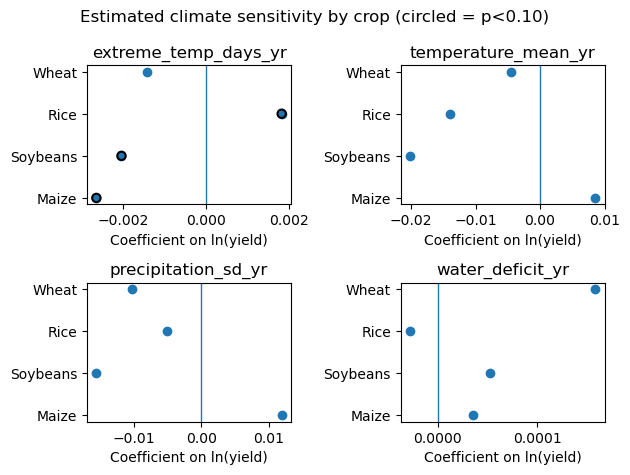

<Figure size 640x480 with 0 Axes>

In [25]:
# plotting climate sensitivity by crop

targets = [
    "extreme_temp_days_yr",
    "temperature_mean_yr",
    "precipitation_sd_yr",
    "water_deficit_yr",
]
df = sens_table[sens_table["variable"].isin(targets)].copy()

crop_order = ["Maize", "Soybeans", "Rice", "Wheat"]
df["crop"] = pd.Categorical(df["crop"], categories=crop_order, ordered=True)

vars_order = [v for v in targets if v in df["variable"].unique()]
ncols = 2
nrows = int(np.ceil(len(vars_order) / ncols))

fig = plt.figure()

for i, var in enumerate(vars_order, start=1):
    ax = fig.add_subplot(nrows, ncols, i)
    sub = df[df["variable"] == var].sort_values("crop")

    # all points
    ax.scatter(sub["coef"], sub["crop"])

    # circle the significant ones (p<0.10)
    if "sig_10" in sub.columns:
        sig = sub[sub["sig_10"]]
        ax.scatter(
            sig["coef"], sig["crop"], facecolors="none", edgecolors="k", linewidths=1.5
        )

    ax.axvline(0, linewidth=1)
    ax.set_title(var)
    ax.set_xlabel("Coefficient on ln(yield)")
    ax.set_ylabel("")

plt.suptitle("Estimated climate sensitivity by crop (circled = p<0.10)")
plt.tight_layout()
plt.show()

plt.savefig("fig1_climate_sensitivity.png", dpi=300, bbox_inches="tight")

This table summarizes crop-specific regression estimates for three key climate variables and labels each effect as positive/negative and statistically significant at the 10% level. Rows are sorted within each climate variable so the most negative (most yield-reducing) associations appear first.

## Vulnerability assessment

Climate stressors are measured on very different scales (e.g., extreme-heat days vs. temperature variability in °C), so comparing raw coefficients can be misleading. We therefore re-express each coefficient as the expected yield change from a typical increase in that stressor, defined as one standard deviation of its observed variation. This produces an interpretable metric: ‘yield impact of a typical shock’. A one–standard deviation change corresponds to a common, data-driven magnitude of fluctuation rather than an arbitrary one-unit change. This can then be summed across risk channels to rank crops by overall vulnerability. 

Because vulnerability is about yield losses, we focus on the yield-reducing portion of standardized effects. For each crop, we compute the predicted yield change from a one–standard deviation increase in each climate stressor and retain only negative (harmful) contributions. Summing these yield-loss contributions produces an overall vulnerability score that reflects both effect size and typical variability of each stressor.

### Defining the vulnerability index

We choose specific risk variables related to temperature and precipitation / water availability for our vulnerability index:

1. More extreme days → more heat stress
2. More temp variability → more instability
3. More precip variability → more erratic rainfall
4. More water deficit → drier / more water stress

For each risk variable, we compute the standard deviation to represent the “typical variation” in each risk variable for that crop’s dataset, which we use to compute a “typical shock effect” (1 SD change).

We associate this standard deviation to the coefficients obtained from our regressions to compute a standardised effect i.e., the change in ln(yield) from a 1 SD increase in each risk variable.

We then chose to define "vulnerability contribution" as only counting harmful effects to crop yield. If the std_effect is negative (i.e., when risk increases, yield decreases), this counts as contributing to vulnerability; if the std_effect is positive, we do not count this as "vulnerability" in the index.

We finally choose to give stronger vulnerability weighting when p-values are smaller, and thus more statistically significant. 

- if p = 0.01 → log(100) ≈ 4.6 (stronger weight)
- if p = 0.10 → log(10) ≈ 2.3
- if p = 0.50 → log(2) ≈ 0.69 (weak weight)


In [26]:
# =========================
# Vulnerability Index (Temp + Water)
# =========================

# choosing risk variables
risk_vars = [
    "extreme_temp_days_yr",  # heat extremes
    "temp_sd_daily_mean_yr",  # temperature variability
    "precipitation_sd_yr",  # precipitation variability
    "water_deficit_yr",  # water stress (evap - precip)
]

# computing the SD of each risk variable within each crop sample
sd_by_crop = (
    df_rq1_analysis.groupby("crop_name")[risk_vars]
    .std()
    .rename(columns=lambda c: f"sd_{c}")
    .reset_index()
)

# keeping only the regression results for the risk variables
coef_sub = rq1_coef_table[rq1_coef_table["variable"].isin(risk_vars)].copy()

# merging SDs onto coefficient table
coef_sub = coef_sub.merge(sd_by_crop, left_on="crop", right_on="crop_name", how="left")

# computing standardised effect: coef * SD(X) = change in ln(yield) for a 1 SD increase in X
coef_sub["std_effect"] = coef_sub["coef"] * coef_sub.apply(
    lambda r: r[f"sd_{r['variable']}"], axis=1
)

# vulnerability contribution: counting only harmful effects (negative std_effect)
coef_sub["vuln_component"] = np.maximum(0, -coef_sub["std_effect"])

# evidence weighting: higher weight attributed if p-value smaller
coef_sub["evidence_weight"] = np.log(1 / coef_sub["pvalue"].clip(lower=1e-6))

# weighted component
coef_sub["vuln_component_w"] = coef_sub["vuln_component"] * coef_sub["evidence_weight"]

# inspecting components
coef_sub_out = coef_sub[
    [
        "crop",
        "variable",
        "coef",
        "pvalue",
        "std_effect",
        "vuln_component",
        "evidence_weight",
        "vuln_component_w",
    ]
].sort_values(["crop", "variable"])

coef_sub_out

,crop,variable,coef,pvalue,std_effect,vuln_component,evidence_weight,vuln_component_w
1,Maize,extreme_temp_days_yr,-0.002643,0.022388,-0.160452,0.160452,3.799215,0.609590
2,Maize,precipitation_sd_yr,0.011914,0.310084,0.051867,0.000000,1.170911,0.000000
0,Maize,temp_sd_daily_mean_yr,0.043312,0.222536,0.149791,0.000000,1.502664,0.000000
3,Maize,water_deficit_yr,0.000036,0.910297,0.049040,0.000000,0.093985,0.000000
5,Rice,extreme_temp_days_yr,0.001826,0.004393,0.101258,0.000000,5.427779,0.000000
6,Rice,precipitation_sd_yr,-0.005097,0.471841,-0.023030,0.023030,0.751114,0.017298
4,Rice,temp_sd_daily_mean_yr,-0.039802,0.091930,-0.123553,0.123553,2.386730,0.294888
7,Rice,water_deficit_yr,-0.000028,0.877355,-0.039249,0.039249,0.130844,0.005135
9,Soybeans,extreme_temp_days_yr,-0.002038,0.087802,-0.112524,0.112524,2.432668,0.273735
10,Soybeans,precipitation_sd_yr,-0.015549,0.210448,-0.070556,0.070556,1.558518,0.109963


In [27]:
# summing vulnerability across risk channels to get one score per crop

vuln_rank = (
    coef_sub.groupby("crop", as_index=False)
    .agg(
        vuln_score=("vuln_component_w", "sum"),
        vuln_score_unweighted=("vuln_component", "sum"),
    )
    .sort_values("vuln_score", ascending=False)
)

vuln_rank

,crop,vuln_score,vuln_score_unweighted
0,Maize,0.609590,0.160452
2,Soybeans,0.383697,0.183080
1,Rice,0.317322,0.185832
3,Wheat,0.208439,0.130709


Using our combined temperature-and-water vulnerability index, maize ranks as the most climate-vulnerable crop, followed by soybeans, rice, and wheat (least vulnerable), based on evidence-weighted yield penalties from typical (1 SD) increases in climate stressors. The weighted score emphasizes relationships supported by stronger statistical evidence, while the unweighted score reflects the magnitude of estimated yield losses.

In [28]:
# looking at main drivers of vulnerability for each crop
drivers = (
    coef_sub[coef_sub["vuln_component_w"] > 0]
    .sort_values(["crop", "vuln_component_w"], ascending=[True, False])
    .groupby("crop")
    .head(2)[["crop", "variable", "coef", "pvalue", "std_effect", "vuln_component_w"]]
)
drivers

,crop,variable,coef,pvalue,std_effect,vuln_component_w
1,Maize,extreme_temp_days_yr,-0.002643,0.022388,-0.160452,0.609590
4,Rice,temp_sd_daily_mean_yr,-0.039802,0.091930,-0.123553,0.294888
6,Rice,precipitation_sd_yr,-0.005097,0.471841,-0.023030,0.017298
9,Soybeans,extreme_temp_days_yr,-0.002038,0.087802,-0.112524,0.273735
10,Soybeans,precipitation_sd_yr,-0.015549,0.210448,-0.070556,0.109963
13,Wheat,extreme_temp_days_yr,-0.001421,0.145454,-0.085295,0.164441
14,Wheat,precipitation_sd_yr,-0.010306,0.379532,-0.045414,0.043998


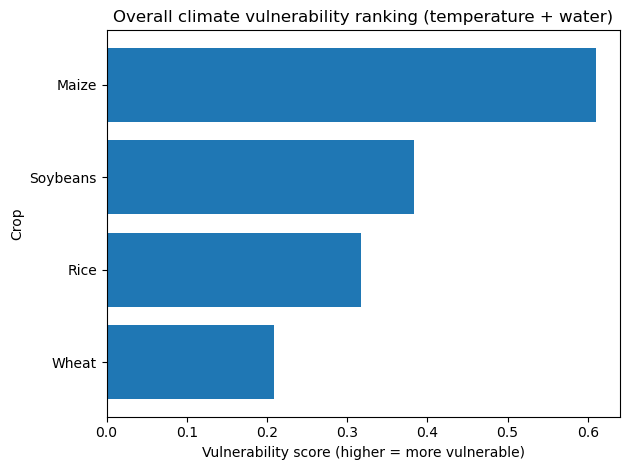

<Figure size 640x480 with 0 Axes>

In [29]:
# Figure 1: vulnerability ranking
plot_df = vuln_rank.sort_values("vuln_score", ascending=True)

plt.figure()
plt.barh(plot_df["crop"], plot_df["vuln_score"])
plt.xlabel("Vulnerability score (higher = more vulnerable)")
plt.ylabel("Crop")
plt.title("Overall climate vulnerability ranking (temperature + water)")
plt.tight_layout()
plt.show()

plt.savefig("fig2_vulnerability_ranking.png", dpi=300, bbox_inches="tight")

### Assessing vulnerability across income levels

We re-estimated crop-specific regressions separately for high-income versus non-high-income countries and compared climate coefficients across groups.

In [30]:
# High-income = "High income" vs. everything else (Low/Middle-income = everything else)

df_rq1_analysis["hi_income"] = (
    df_rq1_analysis["income_group"] == "High income"
).astype(int)

In [31]:
# running per-crop regression twice (HI vs non-HI)


def run_crop_reg(df, crop):
    d = df[df["crop_name"] == crop].copy()
    model = smf.ols(formula, data=d).fit(cov_type="HC1")
    return model, len(d)


groups = {
    "High income": df_rq1_analysis[df_rq1_analysis["hi_income"] == 1],
    "Non-high income": df_rq1_analysis[df_rq1_analysis["hi_income"] == 0],
}

In [32]:
# climate variables to compare across income groups
climate_vars = [
    "temperature_mean_yr",
    "temp_sd_daily_mean_yr",
    "extreme_temp_days_yr",
    "precipitation_yr",
    "precipitation_sd_yr",
    "water_deficit_yr",
]

results = []

for gname, gdf in groups.items():
    crops = sorted(gdf["crop_name"].unique())
    for c in crops:
        m, n = run_crop_reg(gdf, c)

        for var in climate_vars:
            results.append(
                {
                    "group": gname,
                    "crop": c,
                    "n": n,
                    "variable": var,
                    "coef": m.params.get(var, np.nan),
                    "se_robust": m.bse.get(var, np.nan),
                    "pvalue": m.pvalues.get(var, np.nan),
                    "r2": m.rsquared,
                }
            )

rq1_income_coef = pd.DataFrame(results)
rq1_income_coef

,group,crop,n,variable,coef,se_robust,pvalue,r2
0,High income,Maize,66,temperature_mean_yr,0.122109,0.071344,0.086981,0.307681
1,High income,Maize,66,temp_sd_daily_mean_yr,0.051934,0.075540,0.491765,0.307681
2,High income,Maize,66,extreme_temp_days_yr,-0.001692,0.002285,0.458923,0.307681
3,High income,Maize,66,precipitation_yr,-0.000679,0.000926,0.463680,0.307681
4,High income,Maize,66,precipitation_sd_yr,-0.005753,0.032580,0.859844,0.307681
5,High income,Maize,66,water_deficit_yr,-0.000618,0.000771,0.422821,0.307681
6,High income,Rice,41,temperature_mean_yr,0.021842,0.105257,0.835614,0.591825
7,High income,Rice,41,temp_sd_daily_mean_yr,-0.041982,0.098258,0.669190,0.591825
8,High income,Rice,41,extreme_temp_days_yr,0.000464,0.003504,0.894664,0.591825
9,High income,Rice,41,precipitation_yr,-0.000055,0.000934,0.953164,0.591825


In [33]:
# within high-income countries, which crop is most negatively affected by extreme heat?

most_negative = (
    rq1_income_coef.sort_values(["group", "variable", "coef"])  # most negative first
    .groupby(["group", "variable"])
    .head(1)[["group", "variable", "crop", "coef", "pvalue", "n"]]
)

most_negative

,group,variable,crop,coef,pvalue,n
14,High income,extreme_temp_days_yr,Soybeans,-0.003590,0.192683,68
4,High income,precipitation_sd_yr,Maize,-0.005753,0.859844,66
15,High income,precipitation_yr,Soybeans,-0.000817,0.224438,68
7,High income,temp_sd_daily_mean_yr,Rice,-0.041982,0.669190,41
18,High income,temperature_mean_yr,Wheat,-0.038159,0.545773,66
5,High income,water_deficit_yr,Maize,-0.000618,0.422821,66
26,Non-high income,extreme_temp_days_yr,Maize,-0.002128,0.121023,216
40,Non-high income,precipitation_sd_yr,Soybeans,-0.025543,0.080888,147
33,Non-high income,precipitation_yr,Rice,-0.000024,0.909566,197
31,Non-high income,temp_sd_daily_mean_yr,Rice,-0.036827,0.194527,197


In [34]:
# comparing extreme heat (low income vs. high income)

extreme_compare = rq1_income_coef[
    rq1_income_coef["variable"] == "extreme_temp_days_yr"
].pivot_table(
    index=["crop"], columns="group", values=["coef", "pvalue"], aggfunc="first"
)

extreme_compare

coef                      pvalue                
group    High income Non-high income High income Non-high income
crop                                                            
Maize      -0.001692       -0.002128    0.458923        0.121023
Rice        0.000464        0.002350    0.894664        0.001106
Soybeans   -0.003590       -0.001649    0.192683        0.215969
Wheat      -0.002523       -0.001471    0.308891        0.194580

By crop, rice stands out: extreme heat is estimated to increase yields in both income groups, but only the non-high-income estimate is statistically significant (p≈0.001). Maize shows a small negative extreme-heat association in both groups (slightly more negative in non-high-income), while soybeans and wheat also show negative coefficients in both groups, with no strong evidence of a clear high- vs. non-high-income split.

In [35]:
# high vs. low income (side by side) results

wide = rq1_income_coef.pivot_table(
    index=["crop", "variable"], columns="group", values="coef", aggfunc="first"
).reset_index()

# adjust the column names here if your group labels differ slightly
wide["diff_HI_minus_nonHI"] = wide["High income"] - wide["Non-high income"]
wide.sort_values(["variable", "diff_HI_minus_nonHI"])

group,crop,variable,High income,Non-high income,diff_HI_minus_nonHI
12,Soybeans,extreme_temp_days_yr,-0.003590,-0.001649,-0.001942
6,Rice,extreme_temp_days_yr,0.000464,0.002350,-0.001886
18,Wheat,extreme_temp_days_yr,-0.002523,-0.001471,-0.001052
0,Maize,extreme_temp_days_yr,-0.001692,-0.002128,0.000436
1,Maize,precipitation_sd_yr,-0.005753,0.015355,-0.021108
7,Rice,precipitation_sd_yr,0.004481,-0.011588,0.016070
13,Soybeans,precipitation_sd_yr,0.009822,-0.025543,0.035365
19,Wheat,precipitation_sd_yr,0.026753,-0.011814,0.038566
14,Soybeans,precipitation_yr,-0.000817,0.000526,-0.001343
2,Maize,precipitation_yr,-0.000679,0.000142,-0.000821


Overall, income-group heterogeneity is modest for extreme heat and water deficit (coefficients are similar across groups), but much stronger for precipitation variability and especially mean temperature, where several crops exhibit sign reversals between high-income and non-high-income estimates.

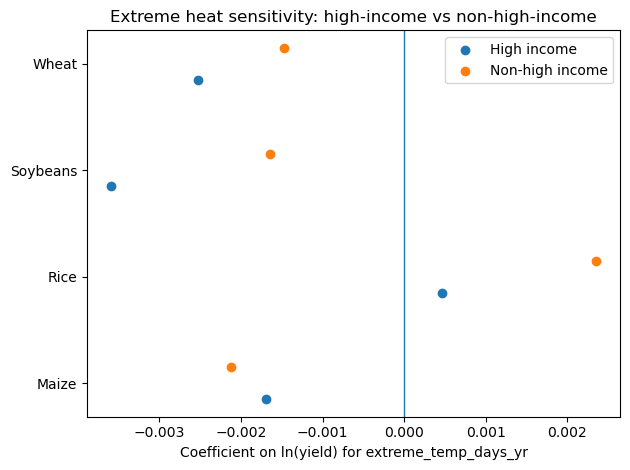

<Figure size 640x480 with 0 Axes>

In [36]:
# Figure 3: income comparison for extreme heat
ec = extreme_compare.copy()

# pulling out the two coefficient series
hi = ec[("coef", "High income")]
nonhi = ec[("coef", "Non-high income")]

crops = ec.index.astype(str)
y = np.arange(len(crops))
offset = 0.15

plt.figure()
plt.scatter(hi.values, y - offset, label="High income")
plt.scatter(nonhi.values, y + offset, label="Non-high income")
plt.axvline(0, linewidth=1)

plt.yticks(y, crops)
plt.xlabel("Coefficient on ln(yield) for extreme_temp_days_yr")
plt.title("Extreme heat sensitivity: high-income vs non-high-income")
plt.legend()
plt.tight_layout()
plt.show()

plt.savefig("fig3_income_diff.png", dpi=300, bbox_inches="tight")

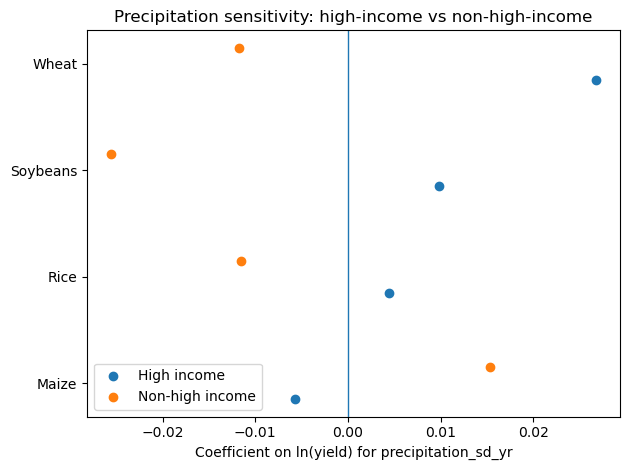

<Figure size 640x480 with 0 Axes>

In [37]:
# plotting income comparison for preciciptaiton variability

precip_compare = rq1_income_coef[
    rq1_income_coef["variable"] == "precipitation_sd_yr"
].pivot_table(index="crop", columns="group", values=["coef", "pvalue"], aggfunc="first")

# Figure 4: income comparison for precipitation (swap variable name in labels/title)

pc = precip_compare.copy()

hi = pc[("coef", "High income")]
nonhi = pc[("coef", "Non-high income")]

crops = pc.index.astype(str)
y = np.arange(len(crops))
offset = 0.15

plt.figure()
plt.scatter(hi.values, y - offset, label="High income")
plt.scatter(nonhi.values, y + offset, label="Non-high income")
plt.axvline(0, linewidth=1)

plt.yticks(y, crops)

# choose label/title that matches what you used above
plt.xlabel("Coefficient on ln(yield) for precipitation_sd_yr")  # or precipitation_yr
plt.title(
    "Precipitation sensitivity: high-income vs non-high-income"
)  # adjust text if SD
plt.legend()
plt.tight_layout()
plt.show()

plt.savefig("fig4_income_precip.png", dpi=300, bbox_inches="tight")

## Research Question 2 (RQ2) - Mapping Regional Food Security Risks

#### Category A: Climate Exposure Indicator

In [38]:
# creating RQ2 dataset
df_rq2 = df_integrated.copy()

# creating model data (no NAs)
df_rq2_model = df_rq1.dropna(subset=["yield_kg_ha"]).copy()
df_rq2_model.shape

(1080, 24)

In [39]:
# Indicator 1) Heat Extremes Index (country-specific min–max scaling)
# For each country, scale extreme_temp_days_yr to [0,1] based on that country's historical min and max.
# 0 = least extreme year for that country; 1 = most extreme year for that country.

# Compute country-specific min and max of extreme heat days across all years
country_min = df_rq2.groupby("country_id")["extreme_temp_days_yr"].transform("min")
country_max = df_rq2.groupby("country_id")["extreme_temp_days_yr"].transform("max")

# Avoid division-by-zero when a country has no variation (i.e. max == min)
denom = (country_max - country_min).replace(0, np.nan)

# Min–max scale within each country
df_rq2["heat_extremes_idx"] = (df_rq2["extreme_temp_days_yr"] - country_min) / denom

# If denom was 0 (no variation), set the index to 0
df_rq2["heat_extremes_idx"] = df_rq2["heat_extremes_idx"].fillna(0.0)


In [40]:
# Evaluate output
heat_table = heat_table_country1_year = (
    df_rq2
    .loc[df_rq2["country_id"] == 1]
    .groupby("year", as_index=False)
    .agg(
        extreme_temp_days_yr=("extreme_temp_days_yr", "mean"),
        heat_extremes_idx=("heat_extremes_idx", "mean")
    )
)

heat_table

,year,extreme_temp_days_yr,heat_extremes_idx
0,2015,141.0,0.428571
1,2016,135.0,0.142857
2,2017,153.0,1.000000
3,2018,140.0,0.380952
4,2019,143.0,0.523810
5,2020,144.0,0.571429
6,2021,147.0,0.714286
7,2022,132.0,0.000000
8,2023,148.0,0.761905


In [41]:
# Indicator 2) Mean Temperature Stress Index
# For each country, compute the historical mean and standard deviation of annual mean temperature.
# Compute a z-score for each year: how unusual that year's temperature is relative to the country's historical distribution.
# Take the absolute value so that both unusually hot and unusually cold years count as "stress".
# Rescale to [0,1] so it can be aggregated with other exposure indices.

# Step 1: Compute country-specific historical mean and standard deviation
country_temp_mean = df_rq2.groupby("country_id")["temperature_mean_yr"].transform("mean")
country_temp_sd = df_rq2.groupby("country_id")["temperature_mean_yr"].transform("std")

# Step 2: Compute z-score
z_score = (df_rq2["temperature_mean_yr"] - country_temp_mean) / country_temp_sd

# Step 3: Convert to absolute deviation
df_rq2["temp_z_abs"] = z_score.abs()

# Step 4: Handle cases where standard deviation was zero
df_rq2["temp_z_abs"] = df_rq2["temp_z_abs"].replace([np.inf, -np.inf], np.nan).fillna(0.0)

# Step 5: Rescale absolute z-scores to [0,1] for index aggregation
z_min = df_rq2["temp_z_abs"].min()
z_max = df_rq2["temp_z_abs"].max()
z_denom = z_max - z_min

if z_denom == 0:
    df_rq2["mean_temp_stress_idx"] = 0.0
else:
    df_rq2["mean_temp_stress_idx"] = (df_rq2["temp_z_abs"] - z_min) / z_denom


In [42]:
# Indicator 3) Precipitation Stress Index (variability-focused)

prec_sd_min = df_rq2["precipitation_sd_yr"].min()
prec_sd_max = df_rq2["precipitation_sd_yr"].max()
prec_sd_denom = prec_sd_max - prec_sd_min

if prec_sd_denom == 0:
    df_rq2["precip_stress_idx"] = 0.0
else:
    df_rq2["precip_stress_idx"] = (df_rq2["precipitation_sd_yr"] - prec_sd_min) / prec_sd_denom

df_rq2["precip_stress_idx"] = df_rq2["precip_stress_idx"].clip(0, 1)


In [43]:
# Indicator 4) Moisture Deficit Index
# Compute moisture deficit as max(0, evapotranspiration_yr - precipitation_yr).
# 0 = no deficit (P >= ET); 1 = highest observed deficit.

# Compute deficit (ensure it never goes below 0)
df_rq2["moisture_deficit"] = (df_rq2["evapotranspiration_yr"] - df_rq2["precipitation_yr"]).clip(lower=0)

md_min = df_rq2["moisture_deficit"].min()
md_max = df_rq2["moisture_deficit"].max()
md_denom = md_max - md_min

if md_denom == 0:
    df_rq2["moisture_deficit_idx"] = 0.0
else:
    df_rq2["moisture_deficit_idx"] = (df_rq2["moisture_deficit"] - md_min) / md_denom

df_rq2["moisture_deficit_idx"] = df_rq2["moisture_deficit_idx"].clip(0, 1)


In [44]:
# Aggregated Exposure Index 
# individual crop index scores weighted by share of harvested area, country-year level
# linear time-weighting so higher scores for more recent years are weighted higher

exposure_components = [
    "heat_extremes_idx",
    "mean_temp_stress_idx",
    "precip_stress_idx",
    "moisture_deficit_idx"
]

# Row-level exposure (country-year-crop)
df_rq2["exposure_idx"] = df_rq2[exposure_components].mean(axis=1).clip(0, 1)

# Compute total harvested area in each country-year
df_rq2["total_area_country_year"] = (
    df_rq2.groupby(["country_id", "year"])["area_harvested_ha"].transform("sum")
)

# Area weights (within country-year)
df_rq2["area_weight"] = df_rq2["area_harvested_ha"] / df_rq2["total_area_country_year"]

# Weighted crop contribution
df_rq2["exposure_weighted_component"] = df_rq2["exposure_idx"] * df_rq2["area_weight"]

# Aggregate to country-year exposure
country_year_exposure = (
    df_rq2
    .groupby(["country_id", "country_name", "year"], as_index=False)
    .agg(exposure_idx=("exposure_weighted_component", "sum"))
)

# Time-weighted country score (linearly increasing weights over available years)
country_year_exposure = country_year_exposure.sort_values(["country_id", "year"]).copy()

# Weight = 1,2,...,n_years within each country
country_year_exposure["time_weight_raw"] = (
    country_year_exposure.groupby("country_id").cumcount() + 1
)

# Normalize weights to sum to 1 within each country
country_year_exposure["time_weight"] = (
    country_year_exposure["time_weight_raw"]
    / country_year_exposure.groupby("country_id")["time_weight_raw"].transform("sum")
)

# Apply time weights
country_year_exposure["exposure_weighted_time"] = (
    country_year_exposure["exposure_idx"] * country_year_exposure["time_weight"]
)

# 7) Final country-level exposure index (one row per country)
country_exposure = (
    country_year_exposure
    .groupby(["country_id", "country_name"], as_index=False)
    .agg(exposure_idx=("exposure_weighted_time", "sum"))
)



#### Category 2: Crop Sensitivity Indicator

In [45]:
import statsmodels.api as sm

In [46]:
# Crop Sensitivity Index via Panel Regression (absolute responsiveness)
# For each country–crop panel, regress yield sensitivity to climate exposure over time.

# Regression specification (estimated separately for each country–crop pair):
#   log(yield_kg_ha_{c,k,t}) = α_{c,k} + β_{c,k} · exposure_idx_{c,t} + ε_{c,k,t}
# - α_{c,k} is a country–crop–specific intercept (implicit by estimating within each panel)
# - β_{c,k} measures the responsiveness of yields to climate exposure

# Crop sensitivity defined as |β_{c,k}|, capturing the magnitude of yield response regardless of direction. This sensitivity is treated as time-invariant within each country–crop pair and later aggregated across crops using harvested-area weights.


# Drop rows with N/A
df_sens = df_rq2.dropna(
    subset=["yield_kg_ha", "exposure_idx"]
).copy()

# Log-transform yield for elasticity interpretation
df_sens["log_yield"] = np.log(df_sens["yield_kg_ha"])

# Keep only country–crop panels with min 6 years
min_years = 6 

valid_panels = (
    df_sens.groupby(["country_id", "crop_id"])["year"]
    .nunique()
    .reset_index(name="n_years")
    .query("n_years >= @min_years")
)

df_sens = df_sens.merge(
    valid_panels[["country_id", "crop_id"]],
    on=["country_id", "crop_id"],
    how="inner"
)

# Run regressions by country–crop
results = []

for (country_id, crop_id), g in df_sens.groupby(["country_id", "crop_id"]):

    X = sm.add_constant(g["exposure_idx"])
    y = g["log_yield"]

    model = sm.OLS(y, X).fit()

    beta = model.params["exposure_idx"]

    results.append({
        "country_id": country_id,
        "crop_id": crop_id,
        "crop_sensitivity_beta": beta,
        "crop_sensitivity": abs(beta),
        "n_obs": int(model.nobs),
        "r_squared": model.rsquared
    })

# Create sensitivity table
crop_sensitivity = pd.DataFrame(results)

# Optional: inspect distribution
crop_sensitivity["crop_sensitivity"].head()


0    1.338436
1    0.550541
2    1.742956
3    0.684159
4    0.258924
Name: crop_sensitivity, dtype: float64

In [47]:
# Normalize crop_sensitivity to 0–1

s_min = crop_sensitivity["crop_sensitivity"].min()
s_max = crop_sensitivity["crop_sensitivity"].max()
s_denom = s_max - s_min

if s_denom == 0:
    crop_sensitivity["crop_sensitivity_idx"] = 0.0
else:
    crop_sensitivity["crop_sensitivity_idx"] = (
        (crop_sensitivity["crop_sensitivity"] - s_min) / s_denom
    ).clip(0, 1)


# Merge crop sensitivity back to df_rq2 (country-year-crop level)

df_rq2 = df_rq2.merge(
    crop_sensitivity[["country_id", "crop_id", "crop_sensitivity_idx"]],
    on=["country_id", "crop_id"],
    how="left"
)


# Area-weight across crops to get country–year sensitivity
# For each country-year, weight crop sensitivity by harvested area share, then sum to get one score per country-year.

# Total harvested area per country-year
df_rq2["total_area_country_year"] = (
    df_rq2.groupby(["country_id", "year"])["area_harvested_ha"].transform("sum")
)

# Crop weights (area share within each country-year)
df_rq2["area_weight"] = df_rq2["area_harvested_ha"] / df_rq2["total_area_country_year"]

# Weighted contribution at the crop-row level
df_rq2["sensitivity_weighted_component"] = (
    df_rq2["crop_sensitivity_idx"] * df_rq2["area_weight"]
)

# Aggregate to country-year sensitivity index
country_year_sensitivity = (
    df_rq2
    .groupby(["country_id", "country_name", "year"], as_index=False)
    .agg(sensitivity_idx=("sensitivity_weighted_component", "sum"))
)


In [48]:
# Average sensitivity by country across all years
country_avg_sensitivity = (
    country_year_sensitivity
    .groupby(["country_id", "country_name"], as_index=False)
    .agg(sensitivity_idx=("sensitivity_idx", "mean"))
)

# Top 10 most sensitive countries (average over time)
country_avg_sensitivity.sort_values(
    "sensitivity_idx", ascending=False
).head(10)


,country_id,country_name,sensitivity_idx
19,20,Turkey,0.726227
15,16,Mali,0.562264
0,1,China,0.537171
2,3,South Korea,0.490495
16,17,Egypt,0.461316
21,22,Tanzania,0.423252
14,15,Malawi,0.405750
11,12,Russia,0.381315
29,30,Indonesia,0.348604
8,9,Ethiopia,0.303789


#### Category 3: Adaptability Indicator

In [49]:
# Indicator 1) Irrigation coverage index (0-1 scale)
# Interpretation: 0 = lowest irrigation coverage observed in your data; 1 = highest.

# Min–max normalize irrigation_pct across the dataset
irr_min = df_rq2["irrigation_pct"].min()
irr_max = df_rq2["irrigation_pct"].max()
irr_denom = irr_max - irr_min

if irr_denom == 0:
    # If irrigation_pct is constant everywhere, there's no variation to score
    df_rq2["irrigation_idx"] = 0.0
else:
    df_rq2["irrigation_idx"] = (
        (df_rq2["irrigation_pct"] - irr_min) / irr_denom
    ).clip(0, 1)


In [50]:
# Indicator 2) Income group 4-tier capacity map
# Convert categorical income_group into a tiered adaptive capacity score.

income_map = {
    "Low income": 0.00,
    "Lower middle income": 0.33,
    "Upper middle income": 0.67,
    "High income": 1.00
}

df_rq2["income_idx"] = df_rq2["income_group"].map(income_map)

In [ ]:
# Indicator 3) Fertilizer adaptive capacity: low-input constraint

fert_col = "fertilizer_use_kg_ha"  

# 1) Compute global percentile thresholds
p10 = df_rq2[fert_col].quantile(0.10)
p20 = df_rq2[fert_col].quantile(0.20)

# 2) Create tiered fertilizer adaptive capacity index
df_rq2["fertilizer_idx"] = np.select(
    [
        df_rq2[fert_col] < p10,
        (df_rq2[fert_col] >= p10) & (df_rq2[fert_col] < p20),
        df_rq2[fert_col] >= p20
    ],
    [
        0.0,   # severely low-input
        0.5,   # moderately low-input
        1.0    # adequate fertilizer access
    ]
)

In [67]:
# Aggregate Adaptive Capacity (Adaptability) Index
# Combines the following weighted indicators:
#   - irrigation_idx (weight 50%)
#   - income_idx     (weight 25%)
#   - fertilizer_idx (weight 25%)
# Interpretation: Higher = more adaptive capacity (less vulnerable).

# Row-level weighted adaptive capacity (country–year–crop)
df_rq2["adaptive_capacity_row"] = (
    0.50 * df_rq2["irrigation_idx"] +
    0.25 * df_rq2["income_idx"] +
    0.25 * df_rq2["fertilizer_idx"]
).clip(0, 1)

# Weight crops by total harvested area to get country–year adaptive capacity 
df_rq2["total_area_country_year"] = (
    df_rq2.groupby(["country_id", "year"])["area_harvested_ha"].transform("sum")
)

# Crop weights (area share within each country-year)
df_rq2["area_weight"] = df_rq2["area_harvested_ha"] / df_rq2["total_area_country_year"]

# Weighted contribution at crop-row level
df_rq2["adaptive_capacity_weighted_component"] = (
    df_rq2["adaptive_capacity_row"] * df_rq2["area_weight"]
)

# Aggregate to one score per country-year
country_year_adaptive_capacity = (
    df_rq2
    .groupby(["country_id", "country_name", "year"], as_index=False)
    .agg(adaptive_capacity_idx=("adaptive_capacity_weighted_component", "sum"))
)

# Reverse the score so higher = worse off (adaptive vulnerability)
country_year_adaptive_capacity["adaptive_vulnerability_idx"] = (
    1 - country_year_adaptive_capacity["adaptive_capacity_idx"]
).clip(0, 1)


#### Create aggregate Food & Climate Vulnerability Index (FCVI) / score

In [68]:
# Country–year FCVI (higher = worse)
country_year_fcvi = (
    country_year_exposure
    .merge(
        country_year_sensitivity,
        on=["country_id", "country_name", "year"],
        how="inner"
    )
    .merge(
        country_year_adaptive_capacity,
        on=["country_id", "country_name", "year"],
        how="inner"
    )
)

# Aggregate FCVI
country_year_fcvi["fcvi_idx"] = (
    country_year_fcvi["exposure_idx"] +
    country_year_fcvi["sensitivity_idx"] +
    country_year_fcvi["adaptive_vulnerability_idx"]
) / 3


In [69]:
# group by country
country_avg_fcvi = (
    country_year_fcvi
    .groupby(["country_id", "country_name"], as_index=False)
    .agg(fcvi_idx=("fcvi_idx", "mean"))
)



In [70]:
# Create country table with all indices
country_fcvi_summary = (
    country_year_fcvi
    .groupby(["country_id", "country_name"], as_index=False)
    .agg(
        exposure_idx=("exposure_idx", "mean"),
        sensitivity_idx=("sensitivity_idx", "mean"),
        adaptive_vulnerability_idx=("adaptive_vulnerability_idx", "mean"),
        fcvi_idx=("fcvi_idx", "mean")
    )
)


In [75]:
# Table for FCVI highest scores (most vulnerable)
top_10_highest_fcvi = (
    country_fcvi_summary
    .sort_values("fcvi_idx", ascending=False)
    .head(10)
)

top_10_highest_fcvi = (
    country_fcvi_summary
    .sort_values("fcvi_idx", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

table_output = (
    top_10_highest_fcvi
    .style
    .format({
        "fcvi_idx": "{:.3f}",
    })
    .background_gradient(
        subset=["fcvi_idx"],
        cmap="Reds"
    )
    .set_caption("Top 10 Countries by Food–Climate Vulnerability Index (FCVI)")
)

table_output

table_output.to_html("fcvi_top10.html")


In [76]:
# Table for FCVI lowest scores (least vulnerable)
top_10_lowest_fcvi = (
    country_fcvi_summary
    .sort_values("fcvi_idx", ascending=True)
    .head(10)
)

top_10_lowest_fcvi = (
    country_fcvi_summary
    .sort_values("fcvi_idx", ascending=True)
    .head(10)
    .reset_index(drop=True)
)

table_output = (
    top_10_lowest_fcvi
    .style
    .format({
        "fcvi_idx": "{:.3f}",
    })
    .background_gradient(
        subset=["fcvi_idx"],
        cmap="Reds"
    )
    .set_caption("Countries with Lowest Food–Climate Vulnerability Index (FCVI)")
)

table_output

table_output.to_html("fcvi_bottom10.html")



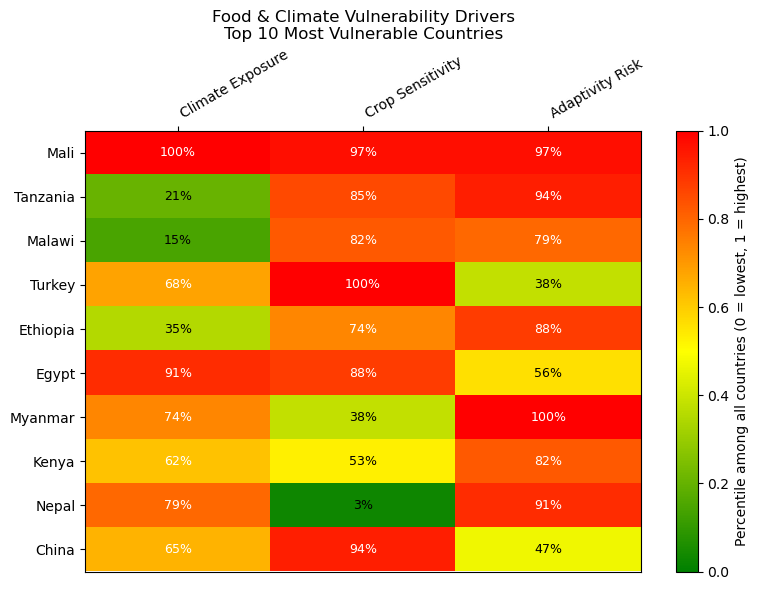

In [73]:
# Heatmap of TOP 10 most vulnerable countries (by FCVI), based on each value's PERCENTILE among ALL countries
from matplotlib.colors import LinearSegmentedColormap

# Components to show
cols = ["exposure_idx", "sensitivity_idx", "adaptive_vulnerability_idx"]
col_labels = ["Climate Exposure", "Crop Sensitivity", "Adaptivity Risk"]

# 1) Compute percentiles across ALL countries (for each column separately)
# Percentile definition here: fraction of countries with value <= this value (0..1)
all_vals = country_fcvi_summary[["country_name"] + cols].copy()

percentile_df = all_vals[cols].apply(
    lambda s: s.rank(pct=True, method="average")
)

# Keep country names alongside percentiles
percentile_df["country_name"] = all_vals["country_name"].values

# 2) Select TOP 10 countries by raw FCVI (still your ranking basis)
top10_names = (
    country_fcvi_summary.sort_values("fcvi_idx", ascending=False)
    .head(10)["country_name"]
    .tolist()
)

# 3) Build the heatmap table: percentiles for those top 10 countries
df_heat_pct = (
    percentile_df[percentile_df["country_name"].isin(top10_names)]
    .set_index("country_name")[cols]
    .loc[top10_names]  # preserve the same ordering as top10 list
)

# 4) Custom red → green colormap (green=low percentile, red=high percentile)
red_green_cmap = LinearSegmentedColormap.from_list(
    "red_green",
    ["green", "yellow", "red"]
)

# 5) Plot heatmap (percentiles are already 0..1)
fig, ax = plt.subplots(figsize=(8, 6))

im = ax.imshow(
    df_heat_pct.values,
    aspect="auto",
    cmap=red_green_cmap,
    vmin=0,
    vmax=1
)

# Y-axis: countries
ax.set_yticks(np.arange(len(df_heat_pct.index)))
ax.set_yticklabels(df_heat_pct.index)

# X-axis: drivers
ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(col_labels, rotation=30, ha="left")
ax.tick_params(axis="x", top=True, bottom=False, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position("top")

# Colorbar (now clearly percentiles)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Percentile among all countries (0 = lowest, 1 = highest)")

# Title
ax.set_title(
    "Food & Climate Vulnerability Drivers\nTop 10 Most Vulnerable Countries",
    fontsize=12
)

# 6) Annotate cells
# Show percentiles as percentages for readability (e.g., 0.93 -> 93rd pct)
for i in range(df_heat_pct.shape[0]):
    for j in range(df_heat_pct.shape[1]):
        p = df_heat_pct.iloc[i, j]
        ax.text(
            j, i,
            f"{p:.0%}",
            ha="center",
            va="center",
            color="white" if p > 0.6 else "black",
            fontsize=9
        )

plt.tight_layout()
plt.show()


In [79]:
country_fcvi_map = (
    country_year_fcvi
    .groupby(["iso3_code", "country_name"], as_index=False)
    .agg(fcvi_idx=("fcvi_idx", "mean"))
)

country_fcvi_map["fcvi_pct"] = (
    country_fcvi_map["fcvi_idx"]
    .rank(pct=True, method="average")
)


In [80]:
import plotly.express as px

# Plot index scores on global map (chloropleth)
fig = px.choropleth(
    country_fcvi_map,
    locations="iso3_code",
    color="fcvi_pct",
    hover_name="country_name",
    hover_data={
        "fcvi_idx": ":.2f",
        "fcvi_pct": ":.0%"
    },
    color_continuous_scale="RdYlGn_r",  # red = high vulnerability
    range_color=(0, 1),
    title="Food & Climate Vulnerability Index (FCVI)\nPercentile Ranking by Country"
)

fig.update_layout(
    margin=dict(l=0, r=0, t=60, b=0),
    coloraxis_colorbar=dict(
        title="Vulnerability percentile<br>(0 = lowest, 100 = highest)"
    )
)

fig.show()


## Question 3: Understanding Agricultural Resilience

In [ ]:
# Inspect structure of crop_weather_integrated
query = """
DESCRIBE crop_weather_integrated;
"""
schema = pd.read_sql(query, engine)
schema

In [ ]:
# Load raw data 

query = """
SELECT
    country_id,
    country_name,
    iso3_code,
    region,
    income_group,
    year,
    crop_id,
    area_harvested_ha,
    yield_kg_ha,
    fertilizer_use_kg_ha,
    irrigation_pct,
    temperature_mean_yr,
    precipitation_yr,
    precipitation_sd_yr,
    extreme_temp_days_yr,
    gdd_yr
FROM crop_weather_integrated
"""

q3_raw = pd.read_sql(query, engine)

print("Rows:", q3_raw.shape[0])
print("Columns:", q3_raw.shape[1])
q3_raw.head()


In [ ]:
# Basic info
q3_raw.info()

# Missingness check
q3_raw.isnull().sum().sort_values(ascending=False)


In [ ]:
# Prepare data for area-weighted aggregation

# Drop rows with missing yield (required for weighting)
q3_weight = q3_raw.dropna(subset=["yield_kg_ha"]).copy()

print("Rows before drop:", q3_raw.shape[0])
print("Rows after drop:", q3_weight.shape[0])

# Create yield × area term
q3_weight["yield_area"] = q3_weight["yield_kg_ha"] * q3_weight["area_harvested_ha"]

# Sanity check
q3_weight[["country_name", "year", "crop_id", "yield_kg_ha", "area_harvested_ha", "yield_area"]].head()


In [ ]:
# Aggregate to country-year level (area-weighted yield)

country_year = (
    q3_weight
    .groupby(
        ["country_id", "country_name", "iso3_code", "region", "income_group", "year"],
        as_index=False
    )
    .agg(
        total_area_ha=("area_harvested_ha", "sum"),
        total_yield_area=("yield_area", "sum")
    )
)

# Compute area-weighted yield
country_year["yield_weighted_kg_ha"] = (
    country_year["total_yield_area"] / country_year["total_area_ha"]
)

print("Country-year rows:", country_year.shape[0])
country_year.head()


In [ ]:
# Check for any weird values
country_year[["total_area_ha", "yield_weighted_kg_ha"]].describe()


In [ ]:
# Yield stability metrics (country-level)

yield_stability = (
    country_year
    .groupby(
        ["country_id", "country_name", "iso3_code", "region", "income_group"],
        as_index=False
    )
    .agg(
        yield_mean=("yield_weighted_kg_ha", "mean"),
        yield_sd=("yield_weighted_kg_ha", "std"),
        n_years=("year", "nunique")
    )
)

# Coefficient of variation
yield_stability["yield_cv"] = (
    yield_stability["yield_sd"] / yield_stability["yield_mean"]
)

yield_stability.head()


In [ ]:
# Distribution of CVs
yield_stability["yield_cv"].describe()


In [ ]:
# Check countries with very few years
yield_stability.sort_values("n_years").head()


**Note:** Agricultural resilience is proxied by low interannual variability in area-weighted yields.

In [ ]:
# Climate variability metrics (country-level)

climate_variability = (
    q3_raw
    .groupby(
        ["country_id", "country_name", "iso3_code", "region", "income_group"],
        as_index=False
    )
    .agg(
        precip_sd_mean=("precipitation_sd_yr", "mean"),
        extreme_temp_mean=("extreme_temp_days_yr", "mean"),
        temp_mean_sd=("temperature_mean_yr", "std"),
        n_years=("year", "nunique")
    )
)

climate_variability.head()


In [ ]:
climate_variability[[
    "precip_sd_mean",
    "extreme_temp_mean",
    "temp_mean_sd"
]].describe()


In [ ]:
climate_variability.sort_values("extreme_temp_mean", ascending=False).head()


In [ ]:
# Merge yield stability and climate variability

resilience_df = pd.merge(
    yield_stability,
    climate_variability[
        [
            "country_id",
            "precip_sd_mean",
            "extreme_temp_mean",
            "temp_mean_sd"
        ]
    ],
    on="country_id",
    how="inner"
)

print("Rows:", resilience_df.shape[0])
resilience_df.head()


In [ ]:
# Sanity check: no missing values
resilience_df.isnull().sum()


In [ ]:
# Creating a simple climate variability index

# Standardize climate variables
for var in ["precip_sd_mean", "extreme_temp_mean", "temp_mean_sd"]:
    resilience_df[f"{var}_z"] = (
        (resilience_df[var] - resilience_df[var].mean())
        / resilience_df[var].std()
    )

# Simple climate variability index
resilience_df["climate_var_index"] = (
    resilience_df[
        ["precip_sd_mean_z", "extreme_temp_mean_z", "temp_mean_sd_z"]
    ].mean(axis=1)
)

resilience_df[
    ["country_name", "yield_cv", "climate_var_index"]
].head()


In [ ]:
# Defining resilience quadrants

# Define median thresholds

yield_cv_median = resilience_df["yield_cv"].median()
climate_var_median = resilience_df["climate_var_index"].median()

yield_cv_median, climate_var_median


In [ ]:
# Classify countries into resilience quadrants

def classify_resilience(row):
    if row["climate_var_index"] >= climate_var_median and row["yield_cv"] <= yield_cv_median:
        return "Resilient under stress"
    elif row["climate_var_index"] >= climate_var_median and row["yield_cv"] > yield_cv_median:
        return "Vulnerable to climate stress"
    elif row["climate_var_index"] < climate_var_median and row["yield_cv"] <= yield_cv_median:
        return "Stable (low stress)"
    else:
        return "Unstable (low stress)"

resilience_df["resilience_type"] = resilience_df.apply(classify_resilience, axis=1)

resilience_df["resilience_type"].value_counts()


In [ ]:
# Inspect who is resilient

resilience_df.sort_values(
    ["resilience_type", "yield_cv"]
)[["country_name", "region", "income_group", "yield_cv", "climate_var_index", "resilience_type"]]


In [ ]:
# Visualizing agricultural resilience

# Scatter plot
for r_type, df_sub in resilience_df.groupby("resilience_type"):
    plt.scatter(
        df_sub["climate_var_index"],
        df_sub["yield_cv"],
        label=r_type,
        alpha=0.75
    )

# Median lines
plt.axvline(climate_var_median, linestyle="--")
plt.axhline(yield_cv_median, linestyle="--")

# Label a few key case-study countries
key_countries = ["Nepal", "China", "United States", "Canada", "South Korea"]
for _, row in resilience_df.iterrows():
    if row["country_name"] in key_countries:
        plt.text(
            row["climate_var_index"] + 0.02,
            row["yield_cv"] + 0.002,
            row["country_name"],
            fontsize=9
        )

plt.xlabel("Climate variability index (standardized)")
plt.ylabel("Yield coefficient of variation")
plt.title("Agricultural resilience: yield stability under climate variability")

plt.legend(title="Resilience classification")
plt.tight_layout()
plt.show()


In [ ]:
# Compare characteristics by resilience type

resilience_summary = (
    q3_raw
    .merge(
        resilience_df[["country_id", "resilience_type"]],
        on="country_id",
        how="left"
    )
    .groupby("resilience_type")
    .agg(
        avg_irrigation=("irrigation_pct", "mean"),
        avg_fertilizer=("fertilizer_use_kg_ha", "mean"),
        avg_area=("area_harvested_ha", "mean")
    )
)

resilience_summary


## *Extensions*
Quantify the **"resilience premium"**
– how much does investment in irrigation or other adaptations reduce yield variability?

In [ ]:
#Build a country-level “investment” dataset

# Extension 1A: Check missingness in key investment vars (raw)
q3_raw[["irrigation_pct", "fertilizer_use_kg_ha"]].isnull().sum()


In [ ]:
# Country-level averages for investment proxies

invest_country = (
    q3_raw
    .groupby(["country_id"], as_index=False)
    .agg(
        irrigation_mean=("irrigation_pct", "mean"),
        fertilizer_mean=("fertilizer_use_kg_ha", "mean")
    )
)

invest_country.head()


In [ ]:
# Merge investment measures into resilience_df

resilience_ext = pd.merge(
    resilience_df,
    invest_country,
    on="country_id",
    how="left"
)

resilience_ext[["country_name", "yield_cv", "climate_var_index", "irrigation_mean", "fertilizer_mean"]].head()


In [ ]:
#Quick check: any missing after merge

resilience_ext[["irrigation_mean", "fertilizer_mean"]].isnull().sum()




#### Quantifying the “premium” with a simple regression:

*How much does investment in irrigation or other adaptations reduce yield variability?*

yield_cv = b0 + b1* irrigation + b2* fertilizer + b3* climate_var_index + controls + error

Where b1 = change in yield_cv per 1 percentage point irrigation

In [ ]:
# Baseline "resilience premium" model
# Irrigation is in percentage points (0–100). Interpretation is per 10 pp.

model1 = smf.ols(
    "yield_cv ~ climate_var_index + irrigation_mean + fertilizer_mean",
    data=resilience_ext
).fit(cov_type="HC1")

print(model1.summary())


In [ ]:
#Convert coefficients into a “premium” statement

b_irrig = model1.params["irrigation_mean"]
b_fert  = model1.params["fertilizer_mean"]

print("Irrigation coefficient:", b_irrig)
print("Fertilizer coefficient:", b_fert)

print("\nInterpretation:")
print("A +10 percentage-point increase in irrigation is associated with a change in yield_cv of:",
      10 * b_irrig)

print("A +10 kg/ha increase in fertilizer is associated with a change in yield_cv of:",
      10 * b_fert)


#### The “under stress” version
Is irrigation especially valuable when climate variability is high?

*yield_cv ~ climate_var_index + irrigation + irrigation*climate_var_index + ...*


In [ ]:
#interaction model (resilience premium under climate stress)

model2 = smf.ols(
    "yield_cv ~ climate_var_index * irrigation_mean + fertilizer_mean",
    data=resilience_ext
).fit(cov_type="HC1")

print(model2.summary())


In [ ]:
# compute the irrigation effect at: Low climate stress (25th percentile of climate_var_index) & High climate stress (75th percentile)

q25 = resilience_ext["climate_var_index"].quantile(0.25)
q75 = resilience_ext["climate_var_index"].quantile(0.75)

b_irrig = model2.params["irrigation_mean"]
b_int   = model2.params["climate_var_index:irrigation_mean"]

effect_low  = b_irrig + b_int * q25
effect_high = b_irrig + b_int * q75

print("Climate index 25th pct:", q25)
print("Climate index 75th pct:", q75)

print("\nMarginal effect of irrigation (per 1 pp):")
print("Low climate stress:", effect_low)
print("High climate stress:", effect_high)

print("\nPer +10 pp irrigation (policy scale):")
print("Low climate stress:", 10 * effect_low)
print("High climate stress:", 10 * effect_high)


#### Identifying tipping points where resilience breaks down;

In [ ]:
# Climate stress bins (tipping-point analysis)

# Create climate stress terciles
resilience_ext["climate_stress_bin"] = pd.qcut(
    resilience_ext["climate_var_index"],
    q=3,
    labels=["Low stress", "Medium stress", "High stress"]
)

resilience_ext["climate_stress_bin"].value_counts()


In [ ]:
# Mean yield CV by climate stress bin

resilience_ext.groupby(
    "climate_stress_bin",
    observed=True
)["yield_cv"].agg(["mean", "std", "count"])



In [ ]:
# Does irrigation still help in high stress?

# Compare irrigation vs yield CV within bins
resilience_ext.groupby(
    "climate_stress_bin",
    observed=True
).agg(
    mean_yield_cv=("yield_cv", "mean"),
    mean_irrigation=("irrigation_mean", "mean")
)


In [ ]:
# Visual tipping point

for label, df_sub in resilience_ext.groupby(
    "climate_stress_bin",
    observed=True
):
    plt.scatter(
        df_sub["irrigation_mean"],
        df_sub["yield_cv"],
        label=label,
        alpha=0.75
    )


plt.xlabel("Average irrigation (%)")
plt.ylabel("Yield coefficient of variation")
plt.title("Tipping points in agricultural resilience")
plt.legend(title="Climate stress level")
plt.tight_layout()
plt.show()


## AI Use Statement

AI tools, primarily ChatGPT, were used in support of the creation of the code in this report. AI was used to troubleshoot errors, brainstorm appropriate data structures and coding solutions, and to clarify SQL & Python coding syntax. All AI use complied with UBC and course guidelines. All code, output, and comments in this file have been customized and verified by the authors. 